## Hydropower Dam Data Exploration

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
# Load the data
metadata = pd.read_csv('../data/metafile_1026.csv', index_col=0, header=None, names=['feature', 'description'])
data = pd.read_csv('../data/global_dams_db_1026.csv')

In [9]:
# Check the number of dams/features
data.shape

(7319, 77)

In [10]:
# Look at the names of the features. Below are the names of the benefit/impact metrics 
# based on Rafa's email:
#      - GEN_GWH_YR - Gigawatts generated per year
#      - RES_BAL - Fisheries change in tonnes of fish per year
#      - CO2EQ_total - Total CO2 emmisions for the dam in g/m^2.year
data.columns

Index(['GRAND_ID', 'DAM_NAME', 'MAIN_BASIN', 'SUB_BASIN', 'NEAR_CITY',
       'COUNTRY', 'SEC_CNTRY', 'YEAR', 'REM_YEAR', 'DAM_HGT_M', 'DAM_LEN_M',
       'AREA_SKM', 'CAP_MCM', 'DEPTH_M', 'DIS_AVG_LS', 'DOR_PC', 'ELEV_MASL',
       'CATCH_SKM', 'USE_IRRI', 'USE_ELEC', 'USE_SUPP', 'USE_FCON', 'USE_RECR',
       'USE_NAVI', 'USE_FISH', 'USE_PCON', 'USE_LIVE', 'USE_OTHR', 'MAIN_USE',
       'LAKE_CTRL', 'LONG_DD', 'LAT_DD', 'COUNTRY_1', 'GDP_capita',
       'Population', 'RES_YLD_TN', 'RES_LSS_TN', 'RES_BAL', 'FISH_RATIO',
       'CO2EQ_areal', 'CO2EQ_total', 'INSCAP_MW', 'pred_INSCAP_MW',
       'GEN_GWH_YR', 'pred_GEN_GWH_YR', 'run_mm_syr', 'inu_pc_umn',
       'sgr_dk_sav', 'clz_cl_smj', 'ari_ix_sav', 'ari_ix_uav', 'glc_cl_smj',
       'pnv_cl_smj', 'wet_cl_smj', 'for_pc_use', 'crp_pc_use', 'pst_pc_use',
       'ire_pc_use', 'gla_pc_use', 'prm_pc_use', 'pac_pc_use', 'fmh_cl_smj',
       'soc_th_uav', 'swc_pc_uyr', 'lit_cl_smj', 'ero_kh_uav', 'pop_ct_usu',
       'ppd_pk_uav', 'urb_pc_

In [13]:
# Print the number of dams that have data on each metric
for column in ['GEN_GWH_YR', 'RES_BAL', 'CO2EQ_total']:
    print("{}: {} dams".format(column, data.shape[0] - data[column].isna().sum()))

GEN_GWH_YR: 477 dams
RES_BAL: 5898 dams
CO2EQ_total: 4813 dams


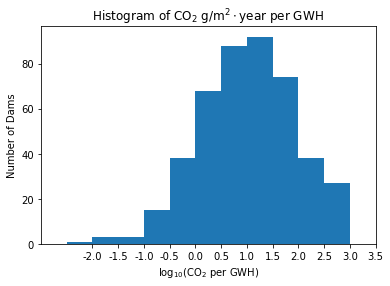

In [20]:
# Plot a histogram of CO2/GWH.yr by order of magnitude
plt.hist(np.log10(data_filt['CO2_total_per_GWH']), bins=np.arange(-2,4,0.5))
plt.xlabel('$\log_{10}$(CO$_2$ per GWH)')
plt.xticks(ticks=np.arange(-2,4,0.5) + 0.5, labels=np.arange(-2,4,0.5))
plt.ylabel('Number of Dams')
plt.xlim([-2.5, 4])
plt.title('Histogram of CO$_2$ g/m$^2 \cdot$year per GWH')
plt.show()

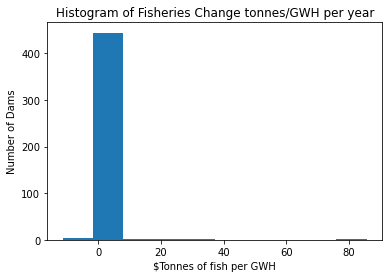

In [23]:
# Plot a histogram of fisheries change in tonnes /m^2.yr by order of magnitude
plt.hist(data_filt['fish_per_GWH'])
plt.xlabel('$Tonnes of fish per GWH')
# plt.xticks(ticks=np.arange(-2,4,0.5) + 0.5, labels=np.arange(-2,4,0.5))
plt.ylabel('Number of Dams')
# plt.xlim([-2.5, 4])
plt.title('Histogram of Fisheries Change tonnes/GWH per year')
plt.show()

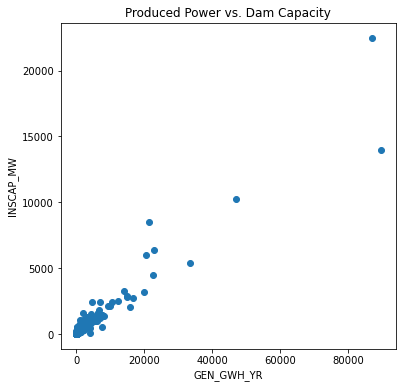

In [24]:
# Compare dam capacity and generated GWH/yr
fig = plt.figure(figsize=(6,6))
plt.scatter(data['GEN_GWH_YR'], data['INSCAP_MW'])
plt.xlabel('GEN_GWH_YR')
plt.ylabel('INSCAP_MW')
plt.title('Produced Power vs. Dam Capacity')
plt.show()

In [25]:
# Delare a vector of features to use
# features = ['DAM_HGT_M', 'DAM_LEN_M', 'AREA_SKM', 'DEPTH_M', 'DIS_AVG_LS', 'DOR_PC', 'ELEV_MASL', 'CATCH_SKM', 
#             'GDP_capita', 'Population', 'run_mm_syr', 'inu_pc_umn', 'sgr_dk_sav', 'clz_cl_smj', 'ari_ix_sav', 
#             'ari_ix_uav', 'glc_cl_smj', 'pnv_cl_smj', 'wet_cl_smj', 'for_pc_use', 'crp_pc_use', 'pst_pc_use', 
#             'ire_pc_use', 'gla_pc_use', 'prm_pc_use', 'pac_pc_use', 'fmh_cl_smj', 'soc_th_uav', 'swc_pc_uyr', 
#             'lit_cl_smj', 'ero_kh_uav', 'pop_ct_usu', 'ppd_pk_uav', 'urb_pc_use', 'hft_ix_u09', 'hdi_ix_sav']

features = ['DAM_HGT_M', 'DAM_LEN_M', 'AREA_SKM', 'DEPTH_M', 'DIS_AVG_LS', 'DOR_PC', 'ELEV_MASL', 'CATCH_SKM', 
            'GDP_capita', 'Population', 'run_mm_syr', 'inu_pc_umn', 'sgr_dk_sav', 'ari_ix_sav', 'ari_ix_uav', 
            'for_pc_use', 'crp_pc_use', 'pst_pc_use', 'ire_pc_use', 'gla_pc_use', 'prm_pc_use', 'pac_pc_use', 
            'soc_th_uav', 'swc_pc_uyr', 'ero_kh_uav', 'pop_ct_usu', 'ppd_pk_uav', 'urb_pc_use', 'hft_ix_u09', 
            'hdi_ix_sav', 'YEAR', 'CAP_MCM', 'RES_YLD_TN', 'RES_LSS_TN', 'CO2_total_per_GWH',
            'fish_per_GWH', 'capacity_factor']

In [ ]:
# # Change categorial features to one-hot encoding
# categorial_features = ['clz_cl_smj', 'glc_cl_smj', 'pnv_cl_smj', 'wet_cl_smj', 
#                        'fmh_cl_smj', 'lit_cl_smj', 'MAIN_USE', 'LAKE_CTRL']

# for feature in categorial_features:
#     categories = pd.unique(data[feature])
#     for category in categories:
#         key = '{}-{}'.format(feature, category)
#         data[key] = data[feature].apply(lambda x: 1 if x == category else 0)
#         features.append(key)

In [28]:
# Look at highly correlated features
cor = data.corr()
cor_table = cor.stack().reset_index().rename(columns={'level_0':'feature_1','level_1':'feature_2', 0:'cor'})
cor_table = cor_table[(cor_table.feature_1 > cor_table.feature_2)]

thresh = 0.8
filt_table = cor_table[(cor_table.cor > thresh) | (cor_table.cor < -thresh)]
filt_table.sort_values(by='cor', ascending=False)

,feature_1,feature_2,cor
1243,pred_INSCAP_MW,pred_GEN_GWH_YR,1.000000
1223,pred_INSCAP_MW,REM_YEAR,1.000000
1325,pred_GEN_GWH_YR,REM_YEAR,1.000000
905,RES_LSS_TN,RES_BAL,0.994301
1189,INSCAP_MW,GEN_GWH_YR,0.960937
1681,ari_ix_uav,ari_ix_sav,0.928361
1401,run_mm_syr,ari_ix_sav,0.873897
2784,hdi_ix_sav,GDP_capita,0.853299
1402,run_mm_syr,ari_ix_uav,0.846017
2981,fish_per_GWH,CO2_areal_per_GWH,0.841455


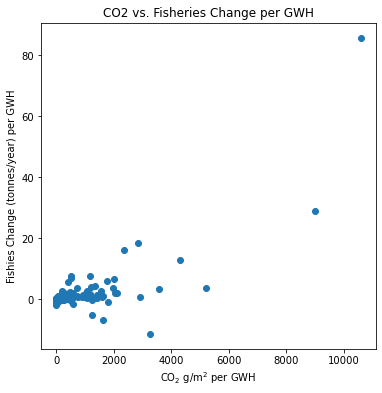

In [29]:
# Plot fisheries gain versus CO2 emissions
fig = plt.figure(figsize=(6,6))
plt.scatter(data['CO2_total_per_GWH'], data['fish_per_GWH'])
plt.xlabel('CO$_2$ g/m$^2$ per GWH')
plt.ylabel('Fishies Change (tonnes/year) per GWH')
plt.title('CO2 vs. Fisheries Change per GWH')
plt.show()

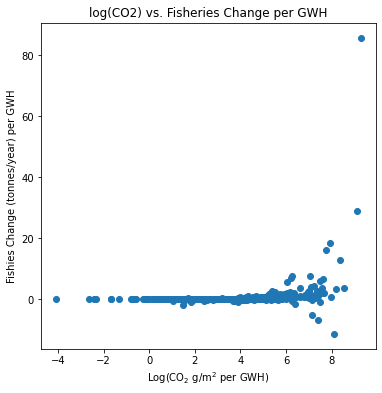

In [30]:
# Plot fisheries gain versus log CO2 emissions
fig = plt.figure(figsize=(6,6))
plt.scatter(np.log(data['CO2_total_per_GWH']), data['fish_per_GWH'])
plt.xlabel('Log(CO$_2$ g/m$^2$ per GWH)')
plt.ylabel('Fishies Change (tonnes/year) per GWH')
plt.title('log(CO2) vs. Fisheries Change per GWH')
plt.show()

In [31]:
# Create cummulative GHG totals over dams
data_filt = data_filt.sort_values(by='CO2_total_per_GWH')
data_filt['CO2_rank'] = np.arange(0, data_filt.shape[0])
data_filt['CO2_cumsum'] = data_filt['CO2_total_per_GWH'].cumsum()
data_filt['CO2_cumavg'] = data_filt.apply(lambda x: x['CO2_cumsum']/(x['CO2_rank']+1), axis=1)
data_filt['power_cumsum'] = data_filt['GEN_GWH_YR'].cumsum()

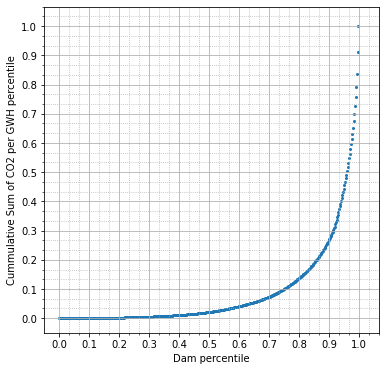

In [32]:
# Create a plot of cummulative sum versus rank by percentile for the CO2 values
fig = plt.figure(figsize=(6,6))
plt.scatter(data_filt['CO2_rank']/data_filt.shape[0], data_filt['CO2_cumsum']/max(data_filt['CO2_cumsum']), s=4)
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
ax = plt.gca()
ax.set_xticks(np.arange(0,1.1,1/30), minor=True)
ax.set_yticks(np.arange(0,1.1,1/30), minor=True)
plt.xlabel('Dam percentile')
plt.ylabel('Cummulative Sum of CO2 per GWH percentile')
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle=':')
plt.show()


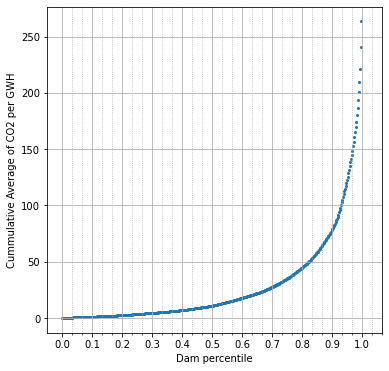

In [33]:
# Create a plot of cummulative sum versus rank by percentile for the CO2 values
fig = plt.figure(figsize=(6,6))
plt.scatter(data_filt['CO2_rank']/data_filt.shape[0], data_filt['CO2_cumavg'], s=4)
plt.xticks(np.arange(0,1.1,0.1))
#plt.yticks(np.arange(0,26,5))
ax = plt.gca()
ax.set_xticks(np.arange(0,1.1,1/30), minor=True)
#ax.set_yticks(np.arange(0,26,1), minor=True)
plt.xlabel('Dam percentile')
plt.ylabel('Cummulative Average of CO2 per GWH')
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle=':')
plt.show()

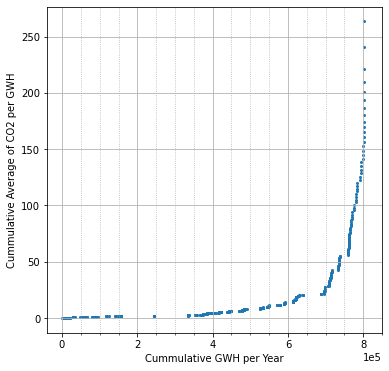

In [34]:
# Create a plot of cummulative sum versus rank by percentile for the CO2 values
fig = plt.figure(figsize=(6,6))
plt.scatter(data_filt['power_cumsum'], data_filt['CO2_cumavg'], s=4)
plt.xticks(np.arange(0,9*10**5,2*10**5))
# plt.yticks(np.arange(0,26,5))
ax = plt.gca()
ax.set_xticks(np.arange(0,9*10**5,0.5*10**5), minor=True)
#ax.set_yticks(np.arange(0,26,1), minor=True)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.xlabel('Cummulative GWH per Year')
plt.ylabel('Cummulative Average of CO2 per GWH')
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle=':')
plt.show()

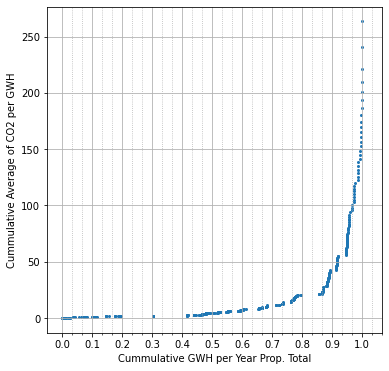

In [35]:
# Create a plot of cummulative sum versus rank by percentile for the CO2 values
fig = plt.figure(figsize=(6,6))
plt.scatter(data_filt['power_cumsum']/max(data_filt['power_cumsum']), data_filt['CO2_cumavg'], s=4)
plt.xticks(np.arange(0,1.1,0.1))
# plt.yticks(np.arange(0,26,5))
ax = plt.gca()
ax.set_xticks((np.arange(0,1.1,1/30)), minor=True)
# ax.set_yticks(np.arange(0,26,1), minor=True)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.xlabel('Cummulative GWH per Year Prop. Total')
plt.ylabel('Cummulative Average of CO2 per GWH')
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle=':')
plt.show()

In [36]:
# Create cummulative GHG totals over dams
data_filt = data_filt.sort_values(by='fish_per_GWH')
data_filt['fish_rank'] = np.arange(0, data_filt.shape[0])
data_filt['fish_cumsum'] = data_filt['fish_per_GWH'].cumsum()

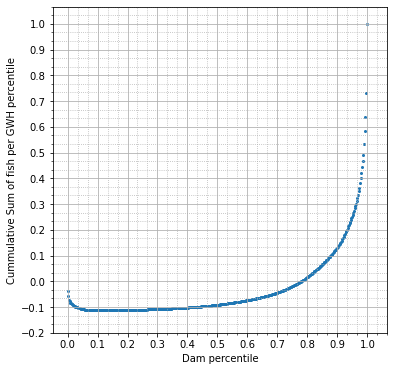

In [37]:
# Create a plot of cummulative sum versus rank by percentile for the fish values
fig = plt.figure(figsize=(6,6))
plt.scatter(data_filt['fish_rank']/data_filt.shape[0], data_filt['fish_cumsum']/max(data_filt['fish_cumsum']), s=4)
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(-.2,1.1,0.1))
ax = plt.gca()
ax.set_xticks(np.arange(0,1.1,1/30), minor=True)
ax.set_yticks(np.arange(-.2,1.1,1/30), minor=True)
plt.xlabel('Dam percentile')
plt.ylabel('Cummulative Sum of fish per GWH percentile')
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle=':')
plt.show()